In [1]:
from scipy.stats import norm
#분포에 관한것 = scipy.stats에 존재(분포패키지)
import seaborn as sns
data_normal = norm.rvs(size=10000, loc=0, scale=1) #표준정규분포 평균1 표준편차0
#rvs = 랜덤으로 수를 발생
#loc 평균, scale 표준편차

[Text(0, 0.5, '도수'), Text(0.5, 0, '정규분포')]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44508 missing from cur

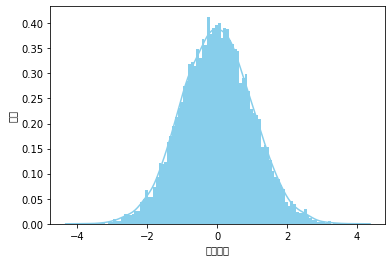

In [2]:
ax = sns.distplot(data_normal, bins=100, kde=True, color='skyblue', hist_kws={'linewidth':15, 'alpha':1})
#bins 구간값 구간속의 놈들을 카운트하라(count 도수를 구하라)
#kde 인터폴레이션(보간법적용해서 없는위치를 주변값으로 부터 구해라.)
#hist_kws 다른데이터들 묶어서 키와 데이터 형식으로 적용
ax.set(xlabel='정규분포', ylabel='도수')

[Text(0, 0.5, '도수'), Text(0.5, 0, '베르누이분포')]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48288 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47476 missing from cur

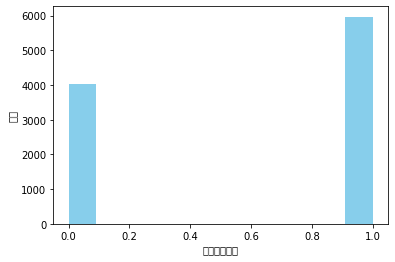

In [7]:
from scipy.stats import bernoulli #베르누이는 0아니면 1, 1아니면 -1 두가지의 경우를 가진다.
data_bern = bernoulli.rvs(size=10000,p=0.6) #p=0.6 1이될 확률이 0.6이라는 말이다.
#0.6부터는 1로 여겨라
ax = sns.distplot(data_bern, kde=False, color='skyblue', hist_kws={'linewidth':15, 'alpha':1})
ax.set(xlabel='베르누이분포', ylabel='도수')
#이항분포

In [11]:
import numpy as np
X = np.array([[-1,-1],[-2,1],[-3,-2],[1,1],[2,1],[3,2]])
Y = np.array([1,1,1,2,2,2])
from sklearn.naive_bayes import GaussianNB
#NB 온라인 서비스 처리 : 속도가 빠르기 때문에
#feature means, variance 를 빠르게 수정가능

#학습파라메터가 적다.(parameter 학습에서 평균과 표준편차를 학습한다.)
#priors 사전확률
#var_smooting 얼마나 부드럽게 할 것인지
clf = GaussianNB()
clf.fit(X,Y)
print(clf.predict([[-0.8,-1]]))

clf_pf = GaussianNB()
clf_pf.partial_fit(X,Y,np.unique(Y)) #partial_fit 일부분에 대해 부분학습이 가능, 온라인 서비스 지원
#이미 있는 데이터에 부분학습
print(clf_pf.predict([[-0.8,-1]]))

[1]
[1]


In [14]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)
#모집단 -> rvs 랜덤으로 추출하였다. -> 랜덤 표본추출
x0 = sp.stats.norm(-2,1).rvs(40) #정규분포 평균-2,표준편차1 40개
x1 = sp.stats.norm(2,1).rvs(60)
#print(np.hstack([x0,x1]))
x = np.hstack([x0,x1])[:,np.newaxis] #2차원으로 변환
y0 = np.zeros(40) #label을 0과 1로 주었다.
y1 = np.ones(60)
y = np.hstack([y0,y1])

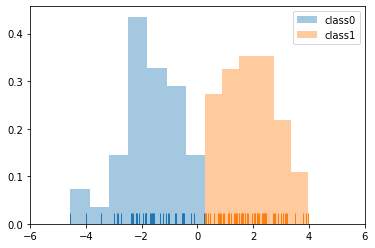

In [16]:
#독립변수에 대해서 출력
sns.distplot(x0, rug=True, kde=False, norm_hist=True, label='class0')
sns.distplot(x1, rug=True, kde=False, norm_hist=True, label='class1')
plt.legend()
plt.xlim(-6,6)
plt.show()

In [17]:
from sklearn.naive_bayes import GaussianNB
clf_norm = GaussianNB().fit(x,y)
#가우시간이 둘을 분리해내는지 확인

In [19]:
clf_norm.classes_
#범주를 확인(종속변수의)

array([0., 1.])

In [20]:
clf_norm.class_count_
#0이 4개 1이 60개로 분류

array([40., 60.])

In [21]:
clf_norm.class_prior_

array([0.4, 0.6])

In [22]:
clf_norm.theta_, clf_norm.sigma_
#평균값과 표준편차의 값
#-2 2
#1 1
#표본들로부터 모델분포 예측하였다.(두집단에 대한 분포예측)

(array([[-1.68745753],
        [ 1.89131838]]),
 array([[1.13280656],
        [0.8668681 ]]))

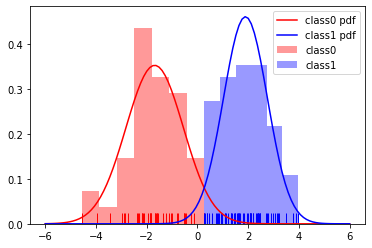

In [26]:
#sp.stats에는 
#rvs(random veriantes)랜덤, pdf(probability density)분위수값 대한 확률, 
#cdf(cumulative distibution)누적확률, ppf(percent point)확률에 대한 분위수
xx = np.linspace(-6,6,100) #일정한 임의의 값으로 범위값을 준 것이다.(그 범위의 확률값을 구한다.)
p0 = sp.stats.norm(clf_norm.theta_[0], clf_norm.sigma_[0]).pdf(xx) #모집단의 분포가 아닌 표본의 분포로 바뀌고
p1 = sp.stats.norm(clf_norm.theta_[1], clf_norm.sigma_[1]).pdf(xx)
sns.distplot(x0, rug=True, kde=False, norm_hist=True, color='r', label='class0')
sns.distplot(x1, rug=True, kde=False, norm_hist=True, color='b', label='class1')
plt.plot(xx, p0, c='r', label='class0 pdf')
plt.plot(xx, p1, c='b', label='class1 pdf')
plt.legend()
plt.show()

In [27]:
x_new = -1
clf_norm.predict_proba([[x_new]])
#x가 -1일때의 확률 (0번클래스의 확률, 1번클래스의 확률)
#이미 분포값이 나왔기 때문에 확률(probability)을 찾을 수 있다.

array([[0.98327446, 0.01672554]])

In [31]:
x_new = 0.1
clf_norm.predict_proba([[x_new]]) #두개가 겹치는 부분에서 애매해진다.
#겹치는 부분에서는 양쪽의 확률이 비슷해진다.

array([[0.47535706, 0.52464294]])

In [40]:
np.random.seed(0)
x = np.random.randint(2, size=(10,4)) #2를제외한 0,1값으로 10*4 변수(feature)가 4개
y = np.array([0,0,0,0,1,1,1,1,1,1]) #종속변수값 세팅
print(x)
print(y)

[[0 1 1 0]
 [1 1 1 1]
 [1 1 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 1 0]
 [1 0 1 1]
 [0 1 1 0]]
[0 0 0 0 1 1 1 1 1 1]


In [42]:
from sklearn.naive_bayes import BernoulliNB
#종속변수나 독립변수가 binaty할 때 사용한다.
#복잡한 경우에는 사용이 어렵다.
#분포가 잘 분류된 경우에는 되는게 복잡한 경우에는 사용이 어렵다.
clf_bern = BernoulliNB().fit(x,y)

In [43]:
clf_bern.classes_
#범주 2개(종속변수)

array([0, 1])

In [44]:
clf_bern.class_count_
#종속변수의 갯수 각 범주별

array([4., 6.])

In [45]:
clf_bern.class_log_prior_
#로그 확률을 사용한다. 로그를 취했기 떄문에 지수형으로 바꾸어 주면 

array([-0.91629073, -0.51082562])

In [46]:
np.exp(clf_bern.class_log_prior_)
#지수형으로 변환하면 원래 확률이 나타난다.

array([0.4, 0.6])

In [47]:
x_new = np.array([0,0,1,1]) #임의의 독립변수 값을 예측
clf_bern.predict([x_new])

array([1])

In [48]:
clf_bern.predict_proba([x_new])

array([[0.09530901, 0.90469099]])

In [50]:
np.random.seed(0)
x0 = np.random.multinomial(10,[0.3,0.5,0.1,0.1],size=4) #10을 각각의 비율로 쪼개서 4개의 행을 만들어라
#10까지의 수를 가중치를 이용해서 수를 발생
print(x0)
x1 = np.random.multinomial(8, [0.1,0.1,0.35,0.45],size=6)
x = np.vstack([x0,x1])
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(x)
print(y)

[[3 4 1 2]
 [3 5 1 1]
 [3 3 0 4]
 [3 4 1 2]]
[[3 4 1 2]
 [3 5 1 1]
 [3 3 0 4]
 [3 4 1 2]
 [1 2 1 4]
 [0 0 5 3]
 [1 2 4 1]
 [1 1 4 2]
 [0 1 2 5]
 [2 1 2 3]]
[0 0 0 0 1 1 1 1 1 1]


In [53]:
from sklearn.naive_bayes import MultinomialNB
clf_mult = MultinomialNB().fit(x,y) #10,9 size error - 독립변수의 행갯수와 종속변수의 갯수가 맞지 않을 경우

In [54]:
clf_mult.classes_
#범주 출력

array([0, 1])

In [55]:
clf_mult.class_count_
#범주당 데이터의 갯수 출력

array([4., 6.])

In [56]:
x_new = np.array([10,10,10,10])
clf_mult.predict_proba([x_new])
#각 범주의 확률이 출력된다.

array([[0.38848858, 0.61151142]])

In [170]:
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
ad_df = pd.read_csv('ad.data', header=None, delimiter=',', engine='python')
ad_df.columns = ['age','workclass','fnlwgt','education','education_num','material_staus','occupation','relationship','race',
                 'sex','capital_gain','capital_loss','hours_per_week','native_country','income']
ad_df.head()

,age,workclass,fnlwgt,education,education_num,material_staus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [171]:
print(ad_df.income.unique)

<bound method Series.unique of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object>


In [172]:
ad_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
material_staus    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [173]:
ad_df_rev = ad_df

In [174]:
ad_df_rev.describe(include='all')
#독립변수들이 범주형인것이 대부분

,age,workclass,fnlwgt,education,education_num,material_staus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [175]:
for value in ['workclass','education','material_staus','occupation','relationship','race','sex','native_country','income']:
    ad_df_rev[value].replace(['?'],[ad_df_rev.describe(include='all')[value][2]], inplace=True)

In [176]:
ad_df_rev.head()

,age,workclass,fnlwgt,education,education_num,material_staus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [177]:
le = preprocessing.LabelEncoder()
workclass_cat = le.fit_transform(ad_df.workclass)
education_cat = le.fit_transform(ad_df.education)
martial_cat = le.fit_transform(ad_df.material_staus)
occupation_cat = le.fit_transform(ad_df.occupation)
relationship_cat = le.fit_transform(ad_df.relationship)
race_cat = le.fit_transform(ad_df.race)
sex_cat = le.fit_transform(ad_df.sex)
native_country_cat = le.fit_transform(ad_df.native_country)
income_cat = le.fit_transform(ad_df.income)

In [178]:
ad_df_rev['workclass_cat'] = workclass_cat
ad_df_rev['education_cat'] = education_cat
ad_df_rev['martial_cat'] = martial_cat
ad_df_rev['occupation_cat'] = occupation_cat
ad_df_rev['relationship_cat'] = relationship_cat
ad_df_rev['race_cat'] = race_cat
ad_df_rev['sex_cat'] = sex_cat
ad_df_rev['native_country_cat'] = native_country_cat
ad_df_rev['income_cat'] = income_cat

In [179]:
dummy_fields = ['workclass','education','material_staus','occupation','relationship','race','sex','native_country','income']

In [180]:
ad_df_rev = ad_df_rev.drop(dummy_fields, axis=1)

In [184]:
num_features=['age','workclass_cat','fnlwgt','education_cat','education_num','marital_cat','occupation_cat','relatonship_cat',
              'race_cat','sex_cat','capital_gain','capital_loss','hours_per_week','native_country_cat']
#뭐징
print(ad_df_rev.shape)
ad_df_rev.head(10)

(32561, 15)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_cat,education_cat,martial_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native_country_cat,income_cat
0,39,77516,13,2174,0,40,7,9,4,1,1,4,1,39,0
1,50,83311,13,0,0,13,6,9,2,4,0,4,1,39,0
2,38,215646,9,0,0,40,4,11,0,6,1,4,1,39,0
3,53,234721,7,0,0,40,4,1,2,6,0,2,1,39,0
4,28,338409,13,0,0,40,4,9,2,10,5,2,0,5,0
5,37,284582,14,0,0,40,4,12,2,4,5,4,0,39,0
6,49,160187,5,0,0,16,4,6,3,8,1,2,0,23,0
7,52,209642,9,0,0,45,6,11,2,4,0,4,1,39,1
8,31,45781,14,14084,0,50,4,12,4,10,1,4,0,39,1
9,42,159449,13,5178,0,40,4,9,2,4,0,4,1,39,1


In [212]:
from sklearn.model_selection import train_test_split
features = ad_df_rev.values[:,:14]
target = ad_df_rev.values[:,14] #종속변수를 income_cat으로 본다.
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=10)
clf = GaussianNB()

In [213]:
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)
accuracy_score(target_test, target_pred, normalize=True)

0.7919225758421738

In [214]:
data = pd.read_csv('titanic_train.csv')
data['sex_cleaned']=np.where(data['Sex']=='male',0,1) #범주화
data['embarked_cleaned']=np.where(data['Embarked']=='S',0,np.where(data['Embarked']=='C',1,np.where(data['Embarked']=='Q',2,3)))
data = data[['Survived','Pclass','sex_cleaned','Age','SibSp','Parch','Fare','embarked_cleaned']].dropna(axis=0,how='any')
X_train, X_test = train_test_split(data, test_size=0.5, random_state=0)
print(data.shape)
print(X_train.shape) #반반으로 분리 0.5
print(X_test.shape)

(714, 8)
(357, 8)
(357, 8)


In [215]:
gnb = GaussianNB()
used_features=['Pclass','sex_cleaned','Age','SibSp','Parch','Fare','embarked_cleaned']
#독립변수 7개
gnb.fit(X_train[used_features].values, X_train['Survived'])
y_pred = gnb.predict(X_test[used_features])
print('총 {}, 잘못분류된것 :{}, 정분류율 :{:05.2f}%'.format(X_test.shape[0], 
                                                (X_test['Survived']!=y_pred).sum(), 
                                                 100*((X_test['Survived']==y_pred).sum()/X_test.shape[0])))

총 357, 잘못분류된것 :84, 정분류율 :76.47%


In [217]:
print('생존자의 운임표준편차', np.sqrt(gnb.sigma_[1][5])) #종속변수 빼고 센다(인덱스셀때)
print('비생존자의 운임', np.sqrt(gnb.sigma_[0][5]))
#gnb.sigma 7개짜리가 2줄나옴 2*7

생존자의 운임표준편차 79.65079820273637
비생존자의 운임 29.985817058014412


In [196]:
#문제
#1.살아있는 사람들의 운임의 평균과 표준편차를 구하시오
#label = 1(참),0(사망)
mean_fare_survived = np.mean(X_train[X_train['Survived']==1]['Fare']) #서바이벌이 1인놈중에 fare에 대해 평균값
std_fare_survived = np.std(X_train[X_train['Survived']==1]['Fare'])
print('살아있는 사람의 운임평균은 ',mean_fare_survived)
print('살아있는 사람의 운임표준편차는 ',std_fare_survived)

살아있는 사람의 운임평균은  58.60781388888886
살아있는 사람의 운임표준편차는  79.65079818120641


In [198]:
#2.생존확률과 사망확률을 구하시오
mean_survival = np.mean(X_train['Survived'])
mean_not_survival = 1- mean_survival
print('생존확률 ', mean_survival*100)
print('사망확률 ', mean_not_survival*100)

생존확률  40.33613445378151
사망확률  59.66386554621849


In [204]:
#3.운임(fare)과 survived와의 관계모델을 생성하고 예측해 보시오
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
used_features = ['Fare']
y_pred = gnb.fit(X_train[used_features].values, X_train['Survived']).predict(X_test[used_features])
print('총 {} 중에 잘못 분류된 수 :{}, {:05.2f}%'.format(X_test.shape[0], (X_test['Survived']!=y_pred).sum(),
                                               100*(1-(X_test['Survived']==y_pred).sum()/X_test.shape[0])))

총 357 중에 잘못 분류된 수 :128, 35.85%


In [ ]:
#GaussianNB
#sigma - 각특징마다 분산을 구해준다.
#variances - class별(예측의 class별, 범주별) 분산을 구해준다.
#theta - 각특징마다평균

In [208]:
#4.생존자의 운임과 표준편차를 구하시오
print('생존자의 운임표준편차', np.sqrt(gnb.sigma_[1][0]))
print('비생존자의 운임표준편차', np.sqrt(gnb.sigma_[0][0]))

생존자의 운임표준편차 79.65079820273641
비생존자의 운임 29.985817058014415


In [210]:
#5.생존자의 운임 평균을 구하시오
print('생존자의 운임평균', np.sqrt(gnb.theta_[1][0])) #1 = 생존자(class별), 0 = 사망자
print('비생존자의 운임평균', np.sqrt(gnb.theta_[0][0]))

생존자의 운임표준편차 7.655574040455026
비생존자의 운임 4.619445681437965


In [211]:
gnb.theta_, gnb.sigma_

(array([[21.3392784 ],
        [58.60781389]]),
 array([[ 899.14922464],
        [6344.24965433]]))

In [191]:
#GaussianNB: 정규분포 나이브베이즈
#BernoulliNB: 베르누이분포 나이브베이즈
#MultinomialNB: 다항분포 나이브베이즈

#classes_ - 종속변수 Y의 클래스(라벨)
#class_count_ - 종속변수 Y의 값이 특정한 클래스인 표본 데이터의 수
#class_prior_ - 종속변수 Y의 무조건부 확률분포  P(Y)  (정규분포의 경우에만)
#class_log_prior_ - 종속변수 Y의 무조건부 확률분포의 로그  logP(Y)  (베르누이분포나 다항분포의 경우에만)

In [236]:
from sklearn import metrics, model_selection
from sklearn.naive_bayes import GaussianNB
data = pd.read_csv('car.data', names=['buying','maint','doors','persons','lug_boot','safety','classes'])
#target = class

In [250]:
#문제
#Gaussian model에 맞도록 전처리를 진행하시오

#info로 확인가능 (모두 문자열로 범주형 변수)
data.info()

le = preprocessing.LabelEncoder()
buying_cat = le.fit_transform(data.buying)
maint_cat = le.fit_transform(data.maint)
doors_cat = le.fit_transform(data.doors)
persons_cat = le.fit_transform(data.persons)
lug_boot_cat = le.fit_transform(data.lug_boot)
safety_cat = le.fit_transform(data.safety)
class_cat = le.fit_transform(data.classes)

data['buying_cat'] = buying_cat
data['maint_cat'] = maint_cat
data['doors_cat'] = doors_cat
data['persons_cat'] = persons_cat
data['lug_boot_cat'] = lug_boot_cat
data['safety_cat'] = safety_cat
data['class_cat'] = class_cat

dummy_fields = ['buying','maint','doors','persons','lug_boot','safety','classes']
data_set = data.drop(dummy_fields, axis=1)

print(data_set.head())
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1728 non-null   object
 1   maint         1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_boot      1728 non-null   object
 5   safety        1728 non-null   object
 6   classes       1728 non-null   object
 7   buying_cat    1728 non-null   int32 
 8   maint_cat     1728 non-null   int32 
 9   doors_cat     1728 non-null   int32 
 10  persons_cat   1728 non-null   int32 
 11  lug_boot_cat  1728 non-null   int32 
 12  safety_cat    1728 non-null   int32 
 13  class_cat     1728 non-null   int32 
dtypes: int32(7), object(7)
memory usage: 141.9+ KB
   buying_cat  maint_cat  doors_cat  persons_cat  lug_boot_cat  safety_cat  \
0           3          3          0            0             2           1   
1           3

In [241]:
#데이터 분할은 3:7로 하시오
from sklearn.model_selection import train_test_split

features = data_set.values[:,:-1]
target = data_set.values[:,-1]
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=10)

GaussianNB(priors=None, var_smoothing=1e-09)

In [255]:
#Gaussian model 로 분류기를 작성하시오
clf = GaussianNB()
clf.fit(features_train, target_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [256]:
#test 데이터에 대한 accuracy를 구하시오
target_pred = clf.predict(features_test)
acc = accuracy_score(target_test, target_pred, normalize=True)
print('accuracy는 ',acc*100,'%')

accuracy는  67.05202312138728 %


In [258]:
#safety에 대한 class별 평균, 표준편차를 모델내에서 구해보시오
    #['unacc','acc','vgood','good']별로 구하시오
print(np.sqrt(clf.sigma_[0][5]))
print(np.sqrt(clf.sigma_[1][5]))
print(np.sqrt(clf.sigma_[2][5]))
print(np.sqrt(clf.sigma_[3][5]))
print(clf.theta_[0][5])
print(clf.theta_[1][5])
print(clf.theta_[2][5])
print(clf.theta_[3][5])

0.9918180449634935
0.9682458372069457
0.7255362306871104
3.561711838789317e-05
0.8723404255319149
1.25
1.063170441001192
0.0
